In [1]:
import cv2
from forward import image_gen_emb_w
from utils import PSNR

In [2]:
image1 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\Lenna.png")
w_image1 = image_gen_emb_w(image1,137,17,19)
image2 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\airplane.png")
w_image2 = image_gen_emb_w(image2,137,17,19)
image3 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\Lake_original.png")
w_image3 = image_gen_emb_w(image3,137,17,19)
image4 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\peppers.png")
w_image4 = image_gen_emb_w(image4,137,17,19)
print("PSNR1",cv2.PSNR(image1,w_image1))
print("PSNR2",cv2.PSNR(image2,w_image2))
print("PSNR3",cv2.PSNR(image3,w_image3))
print("PSNR4",cv2.PSNR(image4,w_image4))

40.72669077501193
40.71117337652473
40.69472648451317
40.40938768277087
PSNR1 40.72669077501193
PSNR2 40.71117337652473
PSNR3 40.69472648451317
PSNR4 40.40938768277087


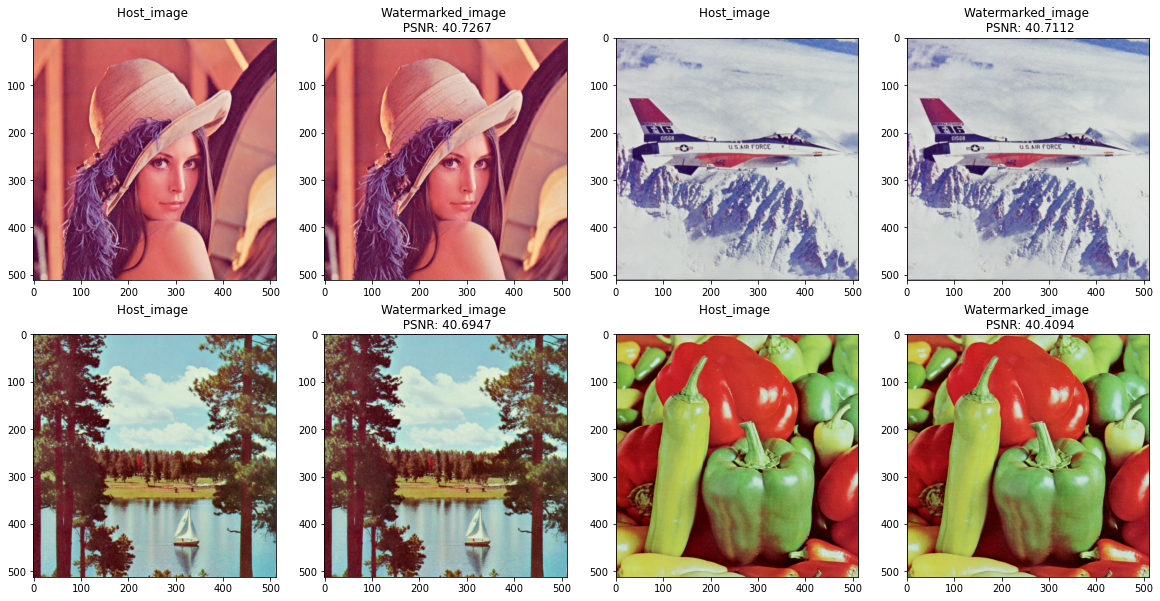

In [3]:
w_str1 = f'PSNR: {PSNR(image1,w_image1):.4f}'
w_str2 = f'PSNR: {PSNR(image2,w_image2):.4f}'
w_str3 = f'PSNR: {PSNR(image3,w_image3):.4f}'
w_str4 = f'PSNR: {PSNR(image4,w_image4):.4f}'
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 4,figsize = (20,10))

axes[0,0].set_title('Host_image \n')
axes[0,1].set_title(f'Watermarked_image \n {w_str1}')
axes[0,0].imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,1].imshow(cv2.cvtColor(w_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[0,2].set_title('Host_image \n')
axes[0,3].set_title(f'Watermarked_image \n {w_str2}')
axes[0,2].imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,3].imshow(cv2.cvtColor(w_image2,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,0].set_title('Host_image \n')
axes[1,1].set_title(f'Watermarked_image \n {w_str3}')
axes[1,0].imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(cv2.cvtColor(w_image3,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,2].set_title('Host_image \n')
axes[1,3].set_title(f'Watermarked_image \n {w_str4}')
axes[1,2].imshow(cv2.cvtColor(image4,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,3].imshow(cv2.cvtColor(w_image4,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [4]:
import numpy as np

tamper_image = w_image1.copy()
tamper_image[:,256:,:]= np.zeros((512,256,3),dtype=np.uint8) 
# tamper_image[230:282,230:282,:]= np.zeros((52,52,3),dtype=np.uint8)

In [5]:
from detect import *
level_1BGR,_ = level_one_detection(tamper_image,137,17,19)
# detec_2 = level_two_detection(detec_1)
# detec_3 = level_three_detection(detec_2)

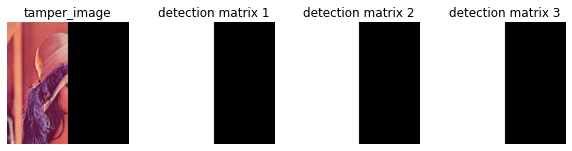

In [6]:
fig, axes = plt.subplots(1, 4,figsize = (10,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'detection matrix 1')
axes[2].set_title(f'detection matrix 2')
axes[3].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(level_1BGR[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2].imshow(level_1BGR[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(level_1BGR[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [7]:
tamper_image1 = w_image1.copy()
tamper_image1[256-81:256+81,256-81:256+81,:]= np.zeros((162,162,3),dtype=np.uint8) 

In [8]:
print(np.sqrt(512*512/10))
print(162/2)

161.90861620062103
81.0


In [9]:
level_1BGR1,_ = level_one_detection(tamper_image1,137,17,19)
level_2BGR1 = level_two_detection(level_1BGR1)
level_3BGR1 = level_three_detection(level_2BGR1)

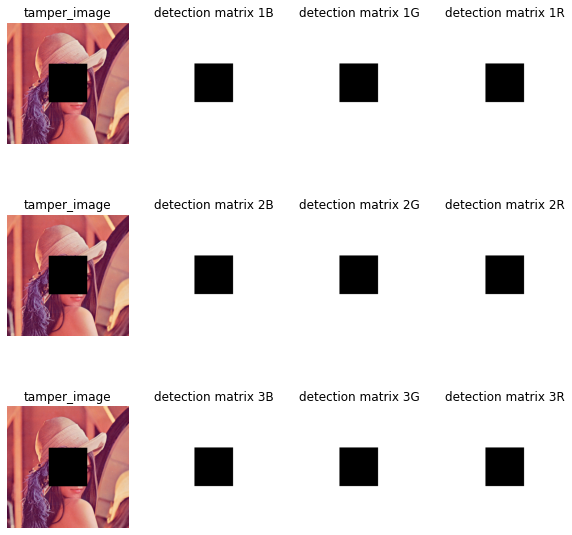

In [10]:
fig, axes = plt.subplots(3, 4,figsize = (10,10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[0,2].set_axis_off()
axes[0,3].set_axis_off()

axes[0,0].set_title(f'tamper_image')
axes[0,1].set_title(f'detection matrix 1B')
axes[0,2].set_title(f'detection matrix 1G')
axes[0,3].set_title(f'detection matrix 1R')

axes[0,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,1].imshow(level_1BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,2].imshow(level_1BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,3].imshow(level_1BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
axes[1,2].set_axis_off()
axes[1,3].set_axis_off()

axes[1,0].set_title(f'tamper_image')
axes[1,1].set_title(f'detection matrix 2B')
axes[1,2].set_title(f'detection matrix 2G')
axes[1,3].set_title(f'detection matrix 2R')

axes[1,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(level_2BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,2].imshow(level_2BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,3].imshow(level_2BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[2,2].set_axis_off()
axes[2,3].set_axis_off()

axes[2,0].set_title(f'tamper_image')
axes[2,1].set_title(f'detection matrix 3B')
axes[2,2].set_title(f'detection matrix 3G')
axes[2,3].set_title(f'detection matrix 3R')

axes[2,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2,1].imshow(level_3BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2,2].imshow(level_3BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2,3].imshow(level_3BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [11]:
from recovery import stage_1_recovery
recover_img1,detection_4 = stage_1_recovery(tamper_image1,137,17,19)

In [12]:
print(PSNR(recover_img1,image1))
r_str1 = f'PSNR: {PSNR(image1,recover_img1):.4f}'
r_str2022 = f'PSNR: {37.96:.4f}'

38.29185503854926


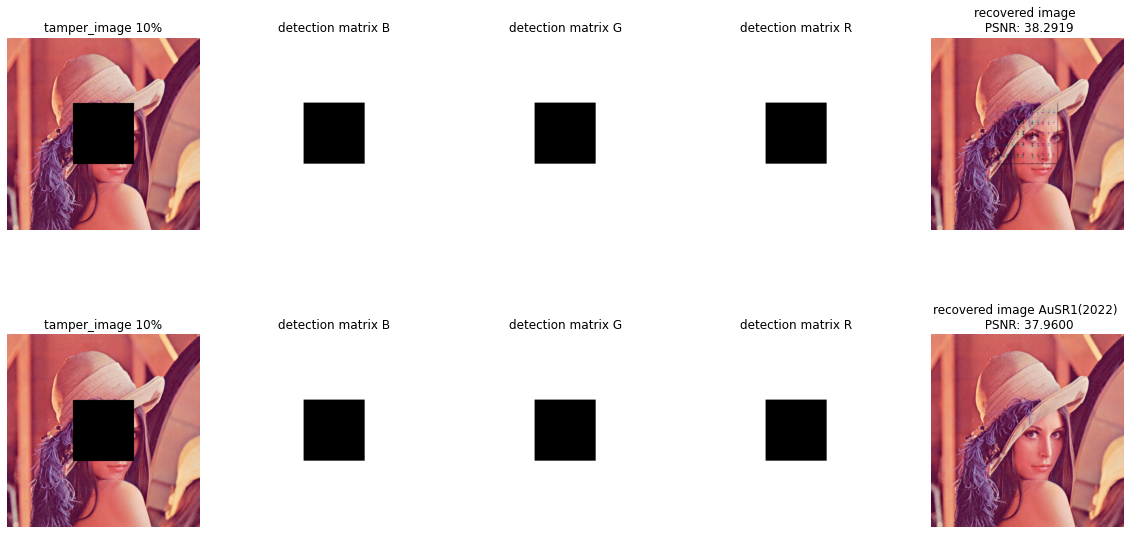

In [13]:
fig, axes = plt.subplots(2,5,figsize = (20,10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[0,2].set_axis_off()
axes[0,3].set_axis_off()
axes[0,4].set_axis_off()

axes[0,0].set_title(f'tamper_image 10%')
axes[0,1].set_title(f'detection matrix B')
axes[0,2].set_title(f'detection matrix G')
axes[0,3].set_title(f'detection matrix R')
axes[0,4].set_title(f'recovered image \n {r_str1}')

axes[0,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,1].imshow(level_3BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,2].imshow(level_3BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,3].imshow(level_3BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,4].imshow(cv2.cvtColor(recover_img1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
axes[1,2].set_axis_off()
axes[1,3].set_axis_off()
axes[1,4].set_axis_off()

axes[1,0].set_title(f'tamper_image 10%')
axes[1,1].set_title(f'detection matrix B')
axes[1,2].set_title(f'detection matrix G')
axes[1,3].set_title(f'detection matrix R')
axes[1,4].set_title(f'recovered image AuSR1(2022) \n {r_str2022}')

axes[1,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(level_3BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,2].imshow(level_3BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,3].imshow(level_3BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,4].imshow(cv2.cvtColor(w_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)